In [75]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
df=pd.read_csv('salary.csv')

In [77]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [78]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

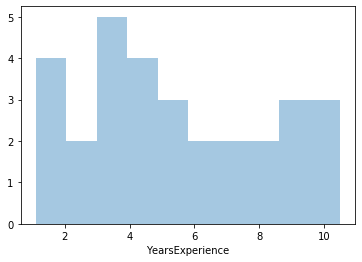

In [79]:
sns.distplot(df['YearsExperience'], kde=False, bins=10)

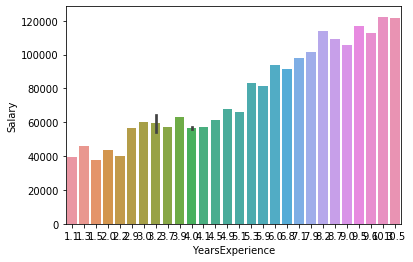

In [80]:
sns.barplot(x='YearsExperience', y='Salary', data=df)

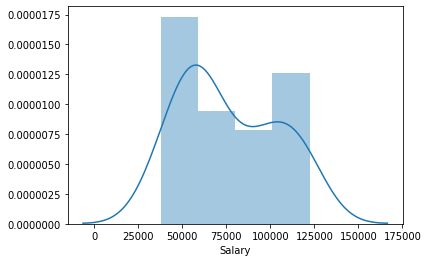

In [81]:
sns.distplot(df.Salary)

In [82]:
#splitting data into independent and dependent variable
y=df.iloc[:, 1].values
x=df.iloc[:, :-1].values

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=1/3, random_state=0)

In [85]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train, y_train)
lr.fit(x_train, y_train)
y_pred=lr.predict(x_test)
print(y_pred)

[ 40835.10590871 123079.39940819  65134.55626083  63265.36777221
 115602.64545369 108125.8914992  116537.23969801  64199.96201652
  76349.68719258 100649.1375447 ]


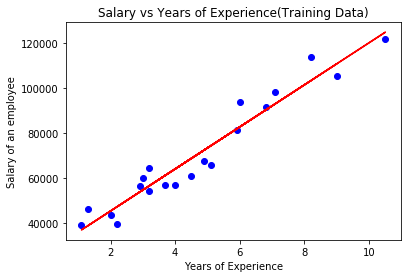

In [86]:
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train, lr.predict(x_train),color='red')
plt.title('Salary vs Years of Experience(Training Data)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary of an employee')
plt.show()

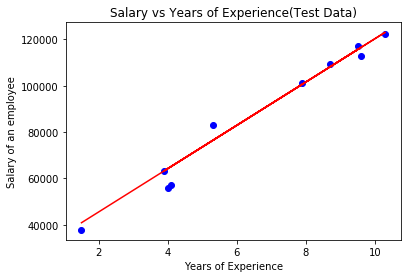

In [87]:
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test, lr.predict(x_test),color='red')
plt.title('Salary vs Years of Experience(Test Data)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary of an employee')
plt.show()

In [88]:
#Knn Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)
y_predict=knn.predict(x_test)
y_predict

array([39343, 98273, 56957, 56957, 98273, 98273, 98273, 56957, 66029,
       91738], dtype=int64)

In [89]:
#Svm Clasifier
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
y_prediction=clf.predict(x_test)
y_prediction

array([ 46205, 121872,  56957,  56957, 105582, 105582, 105582,  56957,
        66029, 113812], dtype=int64)

In [90]:
#Lets check our model accuracy using r2_score
from sklearn.metrics import r2_score
r2_score(y_test,y_prediction)#for svm classifier

0.910000795725282

In [91]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)

clf.fit(x_train, y_train)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=1e-07,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [92]:
preds = clf.predict(x_test)
print(preds)

[ 46205 121872  56957  56957 105582 105582 105582  56957  66029 113812]


In [93]:
r2_score(y_test,preds) #for knn algorithm

0.910000795725282

In [94]:
r2_score(y_test,y_pred)#for linear regression

0.9749154407708353